# notes

# initialize

In [1]:
import os,glob
import numpy as np
import scipy as sp
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import HTML, display
import xlwt, xlrd
from pylab import*
import pprint
import shutil
import pprint
import linecache
import math
import askuser
import Kinetics
from scipy.integrate import odeint

# directory and variables

In [68]:
year = '2019'
moda = '0802'

file_name = 'Analysis'+year+moda

folder = year+'/'+moda
# print(os.getcwd()) 
# print('folder = '+folder)
print(os.getcwd()) 
os.chdir('/Users/kzuraski/Documents/Data/'+year+'/'+moda)

/Users/kzuraski/Documents/Data/2019/0802


# make average log files

In [69]:
f = ""
filelist = []
temp_arr2 = []
summ_file = "AVG_Summary.txt"
no_header = True
head_arr = []

for file in os.listdir(os.getcwd()):
    if file.endswith("_average.log"):
        f = str(file)
        filelist = np.append(filelist, f)
        filelist=sorted(filelist)      
save_file = open(summ_file, 'wb')
save_file.close()   
for idx, item in enumerate(filelist):
    temp_arr2 = []
    temp_arr3 = []
    temp_arr = []
    save_file = open(summ_file, 'ab')
    temp_arr = np.genfromtxt(item, delimiter = '\t', dtype = 'str',skip_header = 1)
    loop_length = len(temp_arr)
    temp_arr = np.transpose(temp_arr)
    if no_header:
        head_arr = np.empty(loop_length*2+1, dtype = np.dtype((str, 35)))
        head_arr[0] = 'File'
        insert_arr = np.repeat(['stdev'], loop_length)
        head_arr[1::2] = temp_arr[0]
        head_arr[2::2] = np.repeat(['stdev'], loop_length)
        np.savetxt(save_file, head_arr[None], delimiter = '\t', fmt="%s")
        no_header = False
    temp_arr2 = np.append(temp_arr2, item)	
    for j in range(0, loop_length):
        temp_arr2 = np.append(temp_arr2, temp_arr[1,j])
        temp_arr2 = np.append(temp_arr2, temp_arr[2,j])
    np.savetxt(save_file, temp_arr2[None], delimiter = '\t',fmt="%s")
    save_file.close() 

# Look at data and calculate concentrations of reactants

In [70]:
os.chdir('/Users/kzuraski/Documents/Data/'+year+'/'+moda)
mix = 4.57 # % mix

# Constants
k_erg_K=1.3806488e-16
kB = 1.3806488e-23
Pa_1_Torr = 133.322368
meOH_A= 8.08097
meOH_B = 1582.27
meOH_C = 239.7
Ace_A = 7.1327
Ace_B = 1219.97
Ace_C = 230.653

# Read Average Log File
data_avg = pd.read_table('AVG_Summary.txt',header=0)
P = 100.4
print('Average Pressure, Torr =') 
print(P)
T = round(data_avg["Temperature: FlowTube"].mean(),2)
print('Average Temperature, K =') 
print(T)

# Calculate Concentrations of Reactants
data_conc = pd.DataFrame({})
data_conc['Run'] = data_avg['File']
data_conc['Conc. Cl2'] = ((Pa_1_Torr*P)/(T*k_erg_K)*
         data_avg['Actual Flow: Cl2/He 50 m']/data_avg['Total Flow '])
# data_conc['Conc. MeOH'] = ((P/(k_erg_K*T)*(data_avg['Actual Flow: MeOH 100 v']
#         /data_avg['Pressure: MeOH 100 v']))*(10**(meOH_A-meOH_B/(meOH_C+data_avg['Temperature: MeOH 100 v']-273.15)))
#         *(10*Pa_1_Torr)/data_avg['Total Flow '])
data_conc['Conc. MeOH'] = ((P/(k_erg_K*T)*(data_avg['Actual Flow: MeOH 100 v']
        /data_avg['Pressure: MeOH 100 v']))*(10**(meOH_A-meOH_B/(meOH_C+272.9-273.15)))
        *(10*Pa_1_Torr)/data_avg['Total Flow '])
data_conc['Conc. Acetone'] = ((P/(k_erg_K*T)*(data_avg['Actual Flow: Acetone 500']
        /data_avg['Pressure: Acetone 500']))*(10**(Ace_A-Ace_B/(Ace_C+data_avg['Temperature: Acetone 500']-273.15)))
        *(10*Pa_1_Torr)/data_avg['Total Flow '])
data_conc['Conc. O2'] = (P/(k_erg_K*T)*data_avg['Actual Flow: O2 v']*Pa_1_Torr*10/data_avg['Total Flow '])
data_conc['Conc. NO'] = (P/(k_erg_K*T)*data_avg['Actual Flow: NO/He']*Pa_1_Torr*10*(mix/100)/data_avg['Total Flow '])
data_conc['Conc. N2'] = (P/(k_erg_K*T)*data_avg['Actual Flow: N2 v']*Pa_1_Torr*10/data_avg['Total Flow '])
display (data_conc)
M = ((P*133.322)/(8314000*T))*6.023E23
print(M)

# Save Average Log File and Calculated Concentrations in Excel File
writer = pd.ExcelWriter(file_name + '.xls')
data_avg.to_excel(writer,'Avg_Summary')
data_conc.to_excel(writer,'Concentrations')
writer.save()

Average Pressure, Torr =
100.4
Average Temperature, K =
271.59


,Run,Conc. Cl2,Conc. MeOH,Conc. Acetone,Conc. O2,Conc. NO,Conc. N2
0,run001_average.log,5.792388e+15,4.559586e+15,2.477968e+14,1.719512e+18,0.000000e+00,1.726132e+18
1,run002_average.log,7.447356e+15,4.559586e+15,2.295356e+14,1.719512e+18,0.000000e+00,1.707927e+18
2,run003_average.log,9.102324e+15,4.559669e+15,2.187926e+14,1.719512e+18,0.000000e+00,1.693032e+18
3,run004_average.log,9.098106e+15,4.556498e+15,1.884349e+14,1.718715e+18,1.207284e+15,1.665780e+18
4,run005_average.log,7.447356e+15,4.558610e+15,1.808128e+14,1.719512e+18,1.207844e+15,1.683102e+18
5,run006_average.log,1.159180e+16,1.331200e+14,3.935624e+16,1.720309e+18,0.000000e+00,1.568147e+18
6,run007_average.log,1.159718e+16,4.716177e+15,2.751727e+16,1.721108e+18,0.000000e+00,1.502780e+18
7,run008_average.log,1.159718e+16,4.721892e+15,2.223889e+16,1.721108e+18,0.000000e+00,1.535910e+18
8,run009_average.log,1.159718e+16,4.723027e+15,3.074707e+16,1.719451e+18,0.000000e+00,1.486547e+18


3.570463524527462e+18


# background subtract and flip IR data sets; Convert UV signals to absorption

In [71]:
ptp = 950 # pre-trigger points for background subtraction

dst_dir = '/Users/kzuraski/Documents/Analysis/'+year+'/'+moda
dst_dir_ir = '/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/ir'
dst_dir_uv = '/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/uv'

# Make new directory in analysis folder and copy IR data files to the new 
if not os.path.exists(dst_dir):
    os.mkdir(dst_dir)
if not os.path.exists(dst_dir_ir):
    os.mkdir(dst_dir_ir)
if not os.path.exists(dst_dir_uv):
    os.mkdir(dst_dir_uv)

os.chdir('/Users/kzuraski/Documents/Data/'+year+'/'+moda)
for file in os.listdir(os.getcwd()):
    if file.endswith("_IR.dat"):
        shutil.copy(file, dst_dir_ir)
    if file.endswith("_UV.dat"):
        shutil.copy(file, dst_dir_uv)
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/ir')
            
# Background Subtract and flip if inverted

for file in os.listdir(os.getcwd()):
    filename, extension = os.path.splitext(file)
    os.rename(file,filename+'.txt')
for file in os.listdir(os.getcwd()):
    df = pd.read_csv(file, sep='\t', header=None, skiprows=1)
    if df.loc[ptp-100,1]>df.loc[ptp+100,1]:
        df.loc[ptp-100,1]= - df.loc[ptp-100,1]
    else:
        df.loc[ptp-100,1] = df.loc[ptp-100,1]
    if df.loc[ptp-100,2]>df.loc[ptp+100,2]:
        df.loc[:,2]= - df.loc[:,2]
    else:
        df.loc[:,2] = df.loc[:,2]    
    df.loc[:,1] = df.loc[:,1]-df.loc[0:(ptp),1].mean()
    df.loc[:,2] = df.loc[:,2]-df.loc[0:(ptp),2].mean()
    np.savetxt(file,df.values, delimiter = '\t', fmt="%s")
    
for item in os.listdir(os.getcwd()):
    if item.endswith(".dat"):
        os.remove(os.path.join(os.getcwd(),item))   

#Convert UV siganl to UV Absorption
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/uv')   
for file in os.listdir(os.getcwd()):
    filename, extension = os.path.splitext(file)
    os.rename(file,filename+'.txt')

for file in os.listdir(os.getcwd()):
    df2 = pd.read_csv(file, sep='\t', header=None, skiprows=1)
    df2.loc[:,1] = np.log(df2.loc[0:450,1].mean()/df2.loc[:,1])
    np.savetxt(file,df2.values, delimiter = '\t', fmt="%s")
    
for item in os.listdir(os.getcwd()):
    if item.endswith(".dat"):
        os.remove(os.path.join(os.getcwd(),item)) 
        
display (data_conc)

,Run,Conc. Cl2,Conc. MeOH,Conc. Acetone,Conc. O2,Conc. NO,Conc. N2
0,run001_average.log,5.792388e+15,4.559586e+15,2.477968e+14,1.719512e+18,0.000000e+00,1.726132e+18
1,run002_average.log,7.447356e+15,4.559586e+15,2.295356e+14,1.719512e+18,0.000000e+00,1.707927e+18
2,run003_average.log,9.102324e+15,4.559669e+15,2.187926e+14,1.719512e+18,0.000000e+00,1.693032e+18
3,run004_average.log,9.098106e+15,4.556498e+15,1.884349e+14,1.718715e+18,1.207284e+15,1.665780e+18
4,run005_average.log,7.447356e+15,4.558610e+15,1.808128e+14,1.719512e+18,1.207844e+15,1.683102e+18
5,run006_average.log,1.159180e+16,1.331200e+14,3.935624e+16,1.720309e+18,0.000000e+00,1.568147e+18
6,run007_average.log,1.159718e+16,4.716177e+15,2.751727e+16,1.721108e+18,0.000000e+00,1.502780e+18
7,run008_average.log,1.159718e+16,4.721892e+15,2.223889e+16,1.721108e+18,0.000000e+00,1.535910e+18
8,run009_average.log,1.159718e+16,4.723027e+15,3.074707e+16,1.719451e+18,0.000000e+00,1.486547e+18


# calibrate HO2 laser

Initial Guesses =
Initial [Cl], Loss, VM(HO2)
(120000000000000.0, 22, 2000000000000.0)
Initial Cost Function Value:47842.7

Optimized Cost Function Value = 45048.8

Optimized Parameters =
Initial [Cl], Loss, VM(HO2)
[1.17100733e+14 2.16898922e+01 2.03428966e+12]


<IPython.core.display.Javascript object>


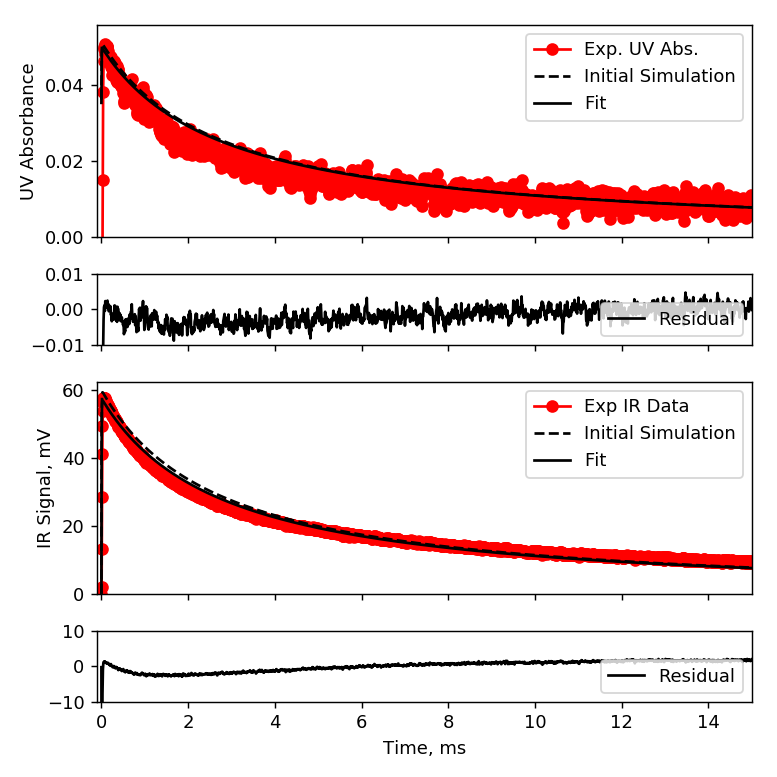

,Run,Conc. Cl2,Conc. MeOH,Conc. Acetone,Conc. O2,Conc. NO,Conc. N2
0,run001_average.log,5.792388e+15,4.559586e+15,2.477968e+14,1.719512e+18,0.000000e+00,1.726132e+18
1,run002_average.log,7.447356e+15,4.559586e+15,2.295356e+14,1.719512e+18,0.000000e+00,1.707927e+18
2,run003_average.log,9.102324e+15,4.559669e+15,2.187926e+14,1.719512e+18,0.000000e+00,1.693032e+18
3,run004_average.log,9.098106e+15,4.556498e+15,1.884349e+14,1.718715e+18,1.207284e+15,1.665780e+18
4,run005_average.log,7.447356e+15,4.558610e+15,1.808128e+14,1.719512e+18,1.207844e+15,1.683102e+18
5,run006_average.log,1.159180e+16,1.331200e+14,3.935624e+16,1.720309e+18,0.000000e+00,1.568147e+18
6,run007_average.log,1.159718e+16,4.716177e+15,2.751727e+16,1.721108e+18,0.000000e+00,1.502780e+18
7,run008_average.log,1.159718e+16,4.721892e+15,2.223889e+16,1.721108e+18,0.000000e+00,1.535910e+18
8,run009_average.log,1.159718e+16,4.723027e+15,3.074707e+16,1.719451e+18,0.000000e+00,1.486547e+18


In [494]:
%matplotlib notebook

# Assumes 200kHz samples/s rate for IR and 100kHz samples/s rate for uv
run = 'run003'
T=296.3
from scipy.optimize import leastsq
np.set_printoptions(threshold=10)
plt.rcParams['figure.figsize'] = [6, 6]

t_start = 0 # ms
t_end = 50 # ms

# Variables
kD = 22#22.2 # Diffusion Rate Coefficient of HO2 at 298K
VM_HO2 = 2e12
Cl_0 = 1.2e14

# Initial concentrations
CH3OH_0=4.559586e+15
O2_0 = 1.719512e+18

p0 = Cl_0, kD, VM_HO2

# Import Data
#uv
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/uv')
samp_file_uv = pd.read_table(run+'_UV.txt', sep='\t', header=None, skiprows=1)
data_tuv, data_uv_abs= samp_file_uv.iloc[460:5458,0],samp_file_uv.iloc[500:5498,1]
#ir
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/ir')
samp_file_ir = pd.read_table(run+'_IR.txt', sep='\t', header=None, skiprows=1)
data_tir, data_ir_s = samp_file_ir.iloc[999:10998,0],samp_file_ir.iloc[999:10998,2]
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda)
t = np.linspace(t_start,t_end,len(data_tir),endpoint=False) # Calculate the time axis (ms)
weight_ir = np.transpose(np.ones(data_tir.size))
weight_uv = np.transpose(np.ones(data_tuv.size))*2000
weight = np.append(weight_uv,weight_ir, axis =0)
obs = np.append(data_uv_abs,data_ir_s, axis = 0)

# Constants
UV_HO2_Xsn225= 2.88e-18 # UV absorption cross-section of HO2 at 225 nm
UV_H2O2_Xsn225 = 2.17e-19 # UV absorption cross-section of H2O2 at 225 nm
L = 148 # Effective Path Length
k1_bi = (3e-13)*np.exp(460/T)
k1_ter = (2.1e-33)*M*np.exp(920/T)
k1 = 1.5e-12# (k1_bi+k1_ter) = 1.58e-12 # HO2+HO2==>H2O2+O2
k2 = 5.5e-11 # Cl+CH3OH==>CH2OH+HCl  
k3 = 9.1e-12 # CH2OH+O2==>HO2+CH2O

HO2_0 = 0
H2O2_0 = 0
CH2OH = 0
HCl_0 = 0
CH2O_0 = 0
CH2OH_0 = 0

c = {}
c['O2'] = O2_0*np.ones(t.size)
c['H2O2'] = np.zeros(t.size)
c['HO2'] = np.zeros(t.size)
c['CH3OH'] = CH3OH_0*np.ones(t.size)
c['HCl'] = np.zeros(t.size)
c['CH2O'] = np.zeros(t.size)
c['CH2OH'] = np.zeros(t.size)

def model_HO2_HO2(t, p):
    idx_zero = np.abs(t).argmin()
    Cl_0 = p[0]
    kD=  p[1]
    VM_HO2 = p[2]
    c['Cl'] = Cl_0*np.ones(t.size)
    kD1 = kD *(T/298)**(3/2) # Diffusion HO2 (loss)
    kD2 = kD * 0.985*(T/298)**(3/2) # Diffusion H2O2 (loss)
    c['HO2'] = HO2_0*np.ones(t.size)
    y0 = np.array([HO2_0, H2O2_0, O2_0, Cl_0, CH3OH_0, CH2OH_0, HCl_0, CH2O_0])
    def calc_dy_dt(y, t_curr):
        HO2 = y[0]
        H2O2 = y[1]
        O2 = y[2]
        Cl = y[3]
        CH3OH = y[4]
        CH2OH = y[5]
        HCl = y[6]
        CH2O=y[7]
        dCl = -k2*Cl*CH3OH
        dCH3OH = -k2*Cl*CH3OH
        dCH2OH = +k2*Cl*CH3OH -k3*CH2OH*O2
        dHCl = +k2*Cl*CH3OH
        dCH2O = +k3*CH2OH*O2
        dHO2 = -k1*HO2*HO2 -k1*HO2*HO2 +k3*CH2OH*O2 -kD1*HO2
        dH2O2 = +k1*HO2*HO2 -kD2*H2O2
        dO2 = +k1*HO2*HO2 -k3*CH2OH*O2
        dy_dt = np.array([dHO2, dH2O2, dO2, dCl, dCH3OH, dCH2OH, dHCl, dCH2O])
        return dy_dt
    odeint_out = odeint(calc_dy_dt, y0, t/1000)    
    c['HO2'][idx_zero:]   = odeint_out.T[0]
    c['H2O2'][idx_zero:] = odeint_out.T[1]
    c['O2'][idx_zero:]  = odeint_out.T[2]
    c['Cl'][idx_zero:]  = odeint_out.T[3]
    c['CH3OH'][idx_zero:]  = odeint_out.T[4]
    c['CH2OH'][idx_zero:]  = odeint_out.T[5]
    c['HCl'][idx_zero:]  = odeint_out.T[6]
    c['CH2O'][idx_zero:]  = odeint_out.T[7]
    sim_abs_uv = 148*(c['HO2']*UV_HO2_Xsn225+c['H2O2']*UV_H2O2_Xsn225) # diff 1
    sim_ir = c['HO2']/VM_HO2  # diff 2
    return c, sim_abs_uv, sim_ir

def fit (model_HO2_HO2,t):
    def calc_cost(p):
        res = []
        _, sim_abs_uv, sim_ir = model_HO2_HO2(t, p)
        sim_abs_uv = sim_abs_uv[1::2]
        sim_abs_uv=sim_abs_uv[:-1]
        mod = np.transpose(np.append(sim_abs_uv, sim_ir, axis =0))
        res = np.sqrt(weight)*(mod-obs)
        return res
    print('Initial Cost Function Value:{:g}'.format((calc_cost(p0)**2).sum()))
    print()
    p, cov_p, infodict, mesg, ier = leastsq(calc_cost, p0, full_output = True, maxfev=1000000000)
    cost = (infodict['fvec']**2).sum()
    if cov_p is not None:
        N = infodict['fvec'].size
        O = p.size
        cov_p *=cost/(N-O)
        p_err = np.sqrt(np.diag(cov_p))
        corr_p = np.array([[cov_p[i][j]/(np.sqrt(cov_p[i][i]*cov_p[j][j])) 
                            for j in range(cov_p.shape[1])] for i in range(cov_p.shape[0])])
#         print(corr_p)
#         print()
    print('Optimized Cost Function Value = {:g}'.format(cost))
    print()
    return p, cov_p, cost, mesg, ier

print('Initial Guesses =')
print('Initial [Cl], Loss, VM(HO2)') 
print(p0)

p, cov_p, cost, mesg, ier = fit(model_HO2_HO2, t)
print('Optimized Parameters =')
print('Initial [Cl], Loss, VM(HO2)') 
print(p)
VMf_HO2 = p[2]

_, sim_abs_uv_i, sim_ir_i = model_HO2_HO2(t, p0)
_, sim_abs_uv, sim_ir = model_HO2_HO2(t, p)
sim_abs_uv_i = sim_abs_uv_i[1::2]
sim_abs_uv_i = sim_abs_uv_i[:-1]
sim_abs_uv = sim_abs_uv[1::2]
sim_abs_uv = sim_abs_uv[:-1]

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, gridspec_kw = {'height_ratios':[3, 1, 3, 1]})
ax1.plot(data_tuv,data_uv_abs, c = 'r',marker='o', label = 'Exp. UV Abs.')
ax1.plot(data_tuv,sim_abs_uv_i, c = 'k', linestyle ='dashed', label = 'Initial Simulation')
ax1.plot(data_tuv,sim_abs_uv, c = 'k', label = 'Fit')
ax2.plot(data_tuv, (data_uv_abs-sim_abs_uv), c='k', label='Residual')
ax3.plot(data_tir,data_ir_s, c = 'r', marker='o',label = 'Exp IR Data')
ax3.plot(t,sim_ir_i, c = 'k', linestyle ='dashed', label = 'Initial Simulation')
ax3.plot(t,sim_ir, c = 'k', label = 'Fit')
ax4.plot(t, (data_ir_s-sim_ir), c='k', label='Residual')
for ax in (ax1, ax2, ax3, ax4):
    ax.label_outer()
    ax.legend(loc="upper right")
    ax.set_xlim([-.1, 15])
for ax in (ax1, ax3):
    ax.set_ylim(ymin=0)
ax2.legend(loc="lower right")
ax4.legend(loc="lower right")
ax2.set_ylim([-.01, .01])
ax4.set_ylim([-10, 10])
ax1.set(ylabel='UV Absorbance')
ax3.set(ylabel='IR Signal, mV')
ax4.set(xlabel='Time, ms')
plt.tight_layout()
plt.show()
plt.savefig('HO2_calibration_'+run+'.png')
display (data_conc)
# list(data_ir_s)

# [Cl] Calibration

,Cl2_Conc,Cl_Conc
0,5.792388e+15,7.776890e+13
1,7.447356e+15,9.690878e+13
2,9.102324e+15,1.170523e+14


slope =
1.187e-02
intercept = 
8.856e+12


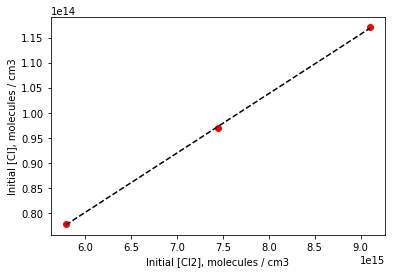

Average VM for HO2 Laser = 
2.17e+12


,Run,Conc. Cl2,Conc. MeOH,Conc. Acetone,Conc. O2,Conc. NO,Conc. N2
0,run001_average.log,5.792388e+15,4.559586e+15,2.477968e+14,1.719512e+18,0.000000e+00,1.726132e+18
1,run002_average.log,7.447356e+15,4.559586e+15,2.295356e+14,1.719512e+18,0.000000e+00,1.707927e+18
2,run003_average.log,9.102324e+15,4.559669e+15,2.187926e+14,1.719512e+18,0.000000e+00,1.693032e+18
3,run004_average.log,9.098106e+15,4.556498e+15,1.884349e+14,1.718715e+18,1.207284e+15,1.665780e+18
4,run005_average.log,7.447356e+15,4.558610e+15,1.808128e+14,1.719512e+18,1.207844e+15,1.683102e+18
5,run006_average.log,1.159180e+16,1.331200e+14,3.935624e+16,1.720309e+18,0.000000e+00,1.568147e+18
6,run007_average.log,1.159718e+16,4.716177e+15,2.751727e+16,1.721108e+18,0.000000e+00,1.502780e+18
7,run008_average.log,1.159718e+16,4.721892e+15,2.223889e+16,1.721108e+18,0.000000e+00,1.535910e+18
8,run009_average.log,1.159718e+16,4.723027e+15,3.074707e+16,1.719451e+18,0.000000e+00,1.486547e+18


In [81]:
%matplotlib inline
Cl2_Conc=[5.792388e+15, 7.447356e+15, 9.102324e+15]
Cl_Conc=[7.77688952e+13,9.69087776e+13,1.17052251e+14]

results = {'Cl2_Conc': pd.Series(Cl2_Conc), 'Cl_Conc': pd.Series(Cl_Conc)}
df = pd.DataFrame(results)
display(df)

# Make plot of Cl to Cl2 relation
plt.plot(Cl2_Conc,Cl_Conc, 'ro')
plt.xlabel('Initial [Cl2], molecules / cm3')
plt.ylabel('Initial [Cl], molecules / cm3')
plt.savefig('Cl_conc.png')

x_data = np.array(results['Cl2_Conc'])
y_data = np.array(results['Cl_Conc'])
(m,b) = polyfit(x_data, y_data, 1)
print('slope =')
print(("{:.3e}".format(m)))
print('intercept = ')
print(("{:.3e}".format(b)))
z = polyval([m,b], x_data)
f = plot(x_data, z, 'k--')
show()


Avg_HO2_VM = (2.14004370e+12 + 2.13782698e+12 + 2.22102204e+12)/3
print('Average VM for HO2 Laser = ')
print("{:.2e}".format(Avg_HO2_VM))
display (data_conc)

# Calibrate OH laser

9.72e+13
 
Initial Cost Function Value:1.17806e+30

Optimized Cost Function Value = 2.24287e+27

Initial Guesses = VM(OH), Loss
90000000000.0 20
 
Optimized Parameters:
VM(OH) =
3.42e+10
Loss =
2.00e+01


<IPython.core.display.Javascript object>


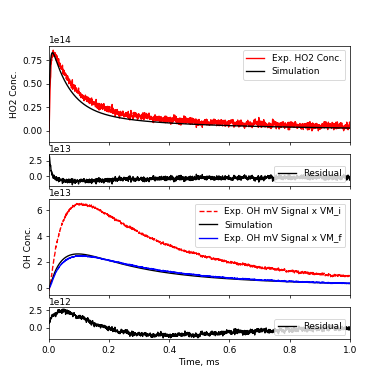

,Run,Conc. Cl2,Conc. MeOH,Conc. Acetone,Conc. O2,Conc. NO,Conc. N2
0,run001_average.log,5.792388e+15,4.559586e+15,2.477968e+14,1.719512e+18,0.000000e+00,1.726132e+18
1,run002_average.log,7.447356e+15,4.559586e+15,2.295356e+14,1.719512e+18,0.000000e+00,1.707927e+18
2,run003_average.log,9.102324e+15,4.559669e+15,2.187926e+14,1.719512e+18,0.000000e+00,1.693032e+18
3,run004_average.log,9.098106e+15,4.556498e+15,1.884349e+14,1.718715e+18,1.207284e+15,1.665780e+18
4,run005_average.log,7.447356e+15,4.558610e+15,1.808128e+14,1.719512e+18,1.207844e+15,1.683102e+18
5,run006_average.log,1.159180e+16,1.331200e+14,3.935624e+16,1.720309e+18,0.000000e+00,1.568147e+18
6,run007_average.log,1.159718e+16,4.716177e+15,2.751727e+16,1.721108e+18,0.000000e+00,1.502780e+18
7,run008_average.log,1.159718e+16,4.721892e+15,2.223889e+16,1.721108e+18,0.000000e+00,1.535910e+18
8,run009_average.log,1.159718e+16,4.723027e+15,3.074707e+16,1.719451e+18,0.000000e+00,1.486547e+18


In [85]:
%matplotlib notebook
from numpy import inf

run = 'run005'

t_start = 0 # ms
t_end = 50 # ms

# Variables - Initial Guesses

VM_OH = 9e10
kD = 20
p1 = VM_OH, kD

# Initial concentrations
# m=0.0128
# b=6.528E+12
# Avg_HO2_VM=1.92e12

CH3OH_0 = 4.556498e+15
O2_0 = 1.719512e+18
Cl2_0 = 9.098106e+15
NO_0 = 1.207284e+15
Cl_0 = (m*Cl2_0+b)*1
print("{:.2e}".format(Cl_0))

#import data
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/ir')
samp_file_ir = pd.read_table(run+'_IR.txt', sep='\t', header=None, skiprows=1)
data_t, data_OH, data_HO2 = samp_file_ir.iloc[12499:137498,0],samp_file_ir.iloc[12499:137498,1],samp_file_ir.iloc[12499:137498,2]
data_HO2 = data_HO2*Avg_HO2_VM

t = np.linspace(t_start,t_end,len(data_t),endpoint=False) # Calculate the time axis (ms)
weight_ir2 = np.transpose(np.ones(data_t.size))
idx_zero = np.abs(t).argmin()

# Rate Constants
# HO2 Generation
k1= 1.58e-11 #(k1_bi+k1_ter) #HO2+HO2==>H2O2+O2, 1.58e-11
k2 = 5.5e-11 # Cl+CH3OH==>CH2OH+HCl, 5.5e-11
k3 = 9.1e-12 # CH2OH+O2==>HO2+CH2O

# NOx/HOx Reactions
k4 = 8e-12 #(3.3e-12)*np.exp(270/T) # HO2+NO==>NO2+OH, 8e-12, A.H. was adjusting this rate to fit.
k5_0= (1.8e-30)*(T/300)**(-3)
k5_inf=(2.8e-11)
k5 = ((k5_0*M)/(1+((k5_0*M)/k5_inf))*.6**((1+(np.log10((k5_0*M)/k5_inf))**2)**-1)) # OH+NO2==>HONO2, JPL1
k6_0= (9.1e-32)*(T/300)**(-3.9)
k6_inf=(4.2e-11)*(T/300)**(-0.5)
k6 = ((k6_0*M)/(1+((k6_0*M)/k6_inf))*0.6**((1+(np.log10((k6_0*M)/k6_inf))**2)**-1)) # OH+NO2==>HOONO, JPL1
k7_0= (7.0e-31)*(T/300)**(-2.6)
k7_inf=(3.6e-11)*(T/300)**(-0.1)
k7 = ((k7_0*M)/(1+((k7_0*M)/k7_inf))*0.6**((1+(np.log10((k7_0*M)/k7_inf))**2)**-1)) # OH+NO==>HONO, JPL1
k8_0= (1.9e-31)*(T/300)**(-3.4)
k8_inf=(4.0e-12)*(T/300)**(-0.3)
k8 = ((k8_0*M)/(1+((k8_0*M)/k8_inf))*0.6**((1+(np.log10((k8_0*M)/k8_inf))**2)**-1)) # HO2+NO2==>HO2NO2, JPL1
k9 = (1.8e-11)*np.exp(-390/T) # OH+HONO==>H2O+NO2
k10_1 = (2.4e-14)*np.exp(460/T)
k10_4 = (2.7e-17)*np.exp(2199/T)
k10_3 = (6.5e-34)*np.exp(1335/T)
k10 = k10_1+k10_3*M/(1+k10_3*M/k10_4) # OH+HONO2==>H2O+NO3, SP2
k11 = (3.9e-14)*np.exp(-900/T) # CH3O+O2==>CH2O+HO2
k12 = 0.85 * (2.9e-12)*np.exp(-345/T) # OH+CH3OH==>CH2OH+H2O
k13 = 0.15 * (2.9e-12)*np.exp(-345/T) # OH+CH3OH==>CH3O+H2O
k14 =  (2.6e-12)*np.exp(-1100/T) # OH+Cl2==>HOCl+Cl
k15 = (3e-12)*np.exp(-500/T) # OH+HOCl==>H2O+ClO
k16 = (7.4e-12)*np.exp(270/T) # OH+ClO==>Cl+HO2
k17 = (6e-12)*np.exp(230/T) # OH+ClO==>HCl+O2
k18 = (4.8e-11)*np.exp(250/T) # OH+HO2==>H2O+O2
k19 = 1.8e-12 # OH+OH==>H2O+O
k20_0= (6.9e-31)*(T/300)**(-1)
k20_inf=(2.6e-11)
k20 = ((k20_0*M)/(1+((k20_0*M)/k20_inf))*0.6**((1+(np.log10((k20_0*M)/k20_inf))**2)**-1)) # OH+OH==>H2O2, JPL1
k21 = 1.8e-12 # OH+H2O2==>H2O+HO2
k22 = (5.5e-12)*np.exp(125/T) # OH+CH2O==>H2O+HCO
k23 = 5.2e-12 # HCO+O2==>HO2+CO
k24 = (1.8e-11)*np.exp(180/T) # O+OH==>O2+H
k25 = (3.0e-11)*np.exp(200/T) # O+HO2==>O2+OH
k26_0= (4.4e-32)*(T/300)**(-1.3) 
k26_inf=(7.5e-11)*(T/300)**(0.2)
k26 = ((k26_0*M)/(1+((k26_0*M)/k26_inf))*0.6**((1+(np.log10((k26_0*M)/k26_inf))**2)**-1)) # H+O2==>HO2, JPL1
k27 = (7.6e-32)*(T/300)**(-1.8) # Cl+NO==>ClNO, k27_0
k28_0= (1.3e-30)*(T/300)**(-2)
k28_inf=(1e-10)*(T/300)**(-1)
k28 = ((k28_0*M)/(1+((k28_0*M)/k28_inf))*0.6**((1+(np.log10((k28_0*M)/k28_inf))**2)**-1)) # Cl+NO2==>ClONO, JPL1
k29_0= (1.8e-31)*(T/300)**(-2)
k29_inf=(1e-10)*(T/300)**(-1)
k29 = ((k29_0*M)/(1+((k29_0*M)/k29_inf))*0.6**((1+(np.log10((k29_0*M)/k29_inf))**2)**-1)) # Cl+NO2==>ClNO2, JPL1
k30 = 0*(3.95e-38)*NO_0*NO_0*O2_0 # NO+NO+O2==>NO2+NO2
# print('Rate Constants:')
# display(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19, k20, k21, k22, k23, k24,
#      k25, k26, k27, k28, k29, k30, kD1, kD2, kD3)

HO2_0 = 0
CH2OH_0 = 0
HCl_0 = 0
O_0 = 0
CH2O_0 = 0
NO2_0 = 0
OH_0 = 0
HONO2_0 = 0
HONO_0 = 0
HONO_0 = 0
HO2NO2_0 = 0
HOONO_0 = 0
H2O_0 = 0
NO3_0 = 0
CH3O_0 = 0
HOCl_0 = 0
ClO_0 = 0
O_0 = 0
HCO_0 = 0
CO_0 = 0
H_0 = 0
ClNO_0 = 0
ClONO_0 = 0
ClNO2_0 = 0
H2O2_0 = 0
print(' ')

c2 = {}
c2['HO2'] = np.zeros(t.size)
c2['CH3OH'] = CH3OH_0*np.ones(t.size)
c2['O2'] = O2_0*np.ones(t.size)
c2['H2O2'] = np.zeros(t.size)
c2['CH2OH'] = np.zeros(t.size)
c2['HCl'] = np.zeros(t.size)
c2['O'] = np.zeros(t.size)
c2['CH2O'] = np.zeros(t.size)
c2['NO2'] = np.zeros(t.size)
c2['OH'] = np.zeros(t.size)
c2['HONO2'] = np.zeros(t.size)
c2['HOONO'] = np.zeros(t.size)
c2['HONO'] = np.zeros(t.size)
c2['HO2NO2'] = np.zeros(t.size)
c2['H2O'] = np.zeros(t.size)
c2['NO3'] = np.zeros(t.size)
c2['CH3O'] = np.zeros(t.size)
c2['Cl2'] = Cl2_0*np.ones(t.size)
c2['HOCl'] = np.zeros(t.size)
c2['ClO'] = np.zeros(t.size)
c2['O'] = np.zeros(t.size)
c2['HCO'] = np.zeros(t.size)
c2['CO'] = np.zeros(t.size)
c2['H'] = np.zeros(t.size)
c2['ClNO'] = np.zeros(t.size)
c2['ClONO'] = np.zeros(t.size)
c2['ClNO2'] = np.zeros(t.size)
c2['Cl'] = Cl_0*np.ones(t.size)
c2['NO'] = NO_0*np.ones(t.size)

def model_HO2_NO(t, p2):
    VM_OH = p2[0]
    kD = 20#p2[1]
    kD1 = (kD)*(T/298)**(3/2) # Diffusion HO2
    kD2 = kD * 0.985*(T/298)**(3/2) # Diffusion H2O2
    kD3 = kD * 1.941*(T/298)**(3/2) # Diffusion OH
    y1 = np.array([HO2_0, CH3OH_0, O2_0, H2O2_0, CH2OH_0, HCl_0, CH2O_0, 
                   NO2_0, OH_0, HONO2_0, HOONO_0, HONO_0, HO2NO2_0, H2O_0, 
                   NO3_0, CH3O_0, Cl2_0, HOCl_0, ClO_0, O_0, HCO_0, CO_0, 
                   H_0, ClNO_0, ClONO_0, ClNO2_0, NO_0, Cl_0])
    def calc_dy2_dt(y2, t_curr):
        HO2 = y2[0]
        CH3OH = y2[1]
        O2 = y2[2]
        H2O2 = y2[3]
        CH2OH = y2[4]
        HCl = y2[5]
        CH2O = y2[6]
        NO2 = y2[7]
        OH = y2[8]
        HONO2 = y2[9]
        HOONO = y2[10]
        HONO = y2[11]
        HO2NO2 = y2[12]
        H2O = y2[13]
        NO3 = y2[14]
        CH3O = y2[15]
        Cl2 = y2[16]
        HOCl = y2[17]
        ClO = y2[18]
        O = y2[19]
        HCO = y2[20]
        CO = y2[21]
        H = y2[22]
        ClNO = y2[23]
        ClONO = y2[24]
        ClNO2 = y2[25]
        NO = y2[26]
        Cl = y2[27]
        dCl = -k2*Cl*CH3OH +k14*OH*Cl2 +k16*OH*ClO -k27*Cl*NO -k28*Cl*NO2 -k29*Cl*NO2
        dCH3OH = -k2*Cl*CH3OH -k12*OH*CH3OH -k13*OH*CH3OH
        dHO2 = (-k1*HO2*HO2 -k1*HO2*HO2 +k3*CH2OH*O2 -k4*HO2*NO -k8*HO2*NO2 +k11*CH3O*O2 +k16*OH*ClO 
                -k18*OH*HO2 +k21*OH*H2O2 +k23*HCO*O2 -k25*O*HO2 +k26*H*O2 -kD1*HO2)
        dO2 = (+k1*HO2*HO2 -k3*CH2OH*O2 -k11*CH3O*O2 +k17*OH*ClO +k18*OH*HO2 -k23*HCO*O2 +k24*O*OH 
               +k25*O*HO2 -k26*H*O2 -k30*NO*NO*O2)
        dH2O2 = +k1*HO2*HO2 +k20*OH*OH -k21*OH*H2O2 -kD2*H2O2
        dCH2OH = +k2*Cl*CH3OH -k3*CH2OH*O2 +k12*OH*CH3OH
        dHCl = +k2*Cl*CH3OH +k17*OH*ClO
        dCH2O = +k3*CH2OH*O2 +k11*CH3O*O2 -k22*OH*CH2O
        dNO2 = (+k4*HO2*NO -k5*OH*NO2 -k6*OH*NO2 -k8*HO2*NO2 +k9*OH*HONO -k28*Cl*NO2 -k29*Cl*NO2 
                +k30*NO*NO*O2 +k30*NO*NO*O2)
        dOH = (+k4*HO2*NO -k5*OH*NO2 -k6*OH*NO2 -k7*OH*NO -k9*OH*HONO -k10*OH*HONO2 -k12*OH*CH3OH 
               -k13*OH*CH3OH -k14*OH*Cl2 -k15*OH*HOCl -k16*OH*ClO -k17*OH*ClO -k18*OH*HO2 -k19*OH*OH 
               -k19*OH*OH -k20*OH*OH -k20*OH*OH -k21*OH*H2O2 -k22*OH*CH2O -k24*O*OH +k25*O*HO2 -kD3*OH)
        dHONO2 = +k5*OH*NO2 -k10*OH*HONO2
        dHOONO = +k6*OH*NO2
        dHONO = +k7*OH*NO -k9*OH*HONO
        dHO2NO2 = +k8*HO2*NO2
        dH2O = (+k9*OH*HONO +k10*OH*HONO2 +k12*OH*CH3OH +k13*OH*CH3OH +k15*OH*HOCl +k18*OH*HO2 +k19*OH*OH 
                +k21*OH*H2O2 +k22*OH*CH2O)
        dNO3 = +k10*OH*HONO2
        dCH3O = -k11*CH3O*O2 +k13*OH*CH3OH
        dCl2 = -k14*OH*Cl2
        dHOCl = +k14*OH*Cl2 -k15*OH*HOCl
        dClO = +k15*OH*HOCl -k16*OH*ClO -k17*OH*ClO
        dO = +k19*OH*OH -k24*O*OH -k25*O*HO2
        dHCO = +k22*OH*CH2O -k23*HCO*O2
        dCO = +k23*HCO*O2
        dH = +k24*O*OH -k26*H*O2
        dClNO = +k27*Cl*NO
        dClONO = +k28*Cl*NO2
        dClNO2 = +k29*Cl*NO2
        dNO = -k4*HO2*NO -k7*OH*NO -k27*Cl*NO -k30*NO*NO*O2 -k30*NO*NO*O2
        dy2_dt = np.array([dHO2, dCH3OH, dO2, dH2O2, dCH2OH, dHCl, dCH2O, dNO2, dOH, dHONO2, dHOONO, dHONO, 
                          dHO2NO2, dH2O, dNO3, dCH3O, dCl2, dHOCl, dClO, dO, dHCO, dCO, dH, dClNO, dClONO, 
                           dClNO2, dNO, dCl])
        return dy2_dt
    odeint_out = odeint(calc_dy2_dt, y1, t/1000) 
    c2['HO2'][idx_zero:] = odeint_out.T[0]
    c2['CH3OH'][idx_zero:] = odeint_out.T[1]
    c2['O2'][idx_zero:] = odeint_out.T[2]
    c2['H2O2'][idx_zero:] = odeint_out.T[3]
    c2['CH2OH'][idx_zero:] = odeint_out.T[4]
    c2['HCl'][idx_zero:] = odeint_out.T[5]
    c2['CH2O'][idx_zero:] = odeint_out.T[6]
    c2['NO2'][idx_zero:] = odeint_out.T[7]
    c2['OH'][idx_zero:] = odeint_out.T[8]
    c2['HONO2'][idx_zero:] = odeint_out.T[9]
    c2['HOONO'][idx_zero:] = odeint_out.T[10]
    c2['HONO'][idx_zero:] = odeint_out.T[11]
    c2['HO2NO2'][idx_zero:] = odeint_out.T[12]
    c2['H2O'][idx_zero:] = odeint_out.T[13]
    c2['NO3'][idx_zero:] = odeint_out.T[14]
    c2['CH3O'][idx_zero:] = odeint_out.T[15]
    c2['Cl2'][idx_zero:] = odeint_out.T[16]
    c2['HOCl'][idx_zero:] = odeint_out.T[17]
    c2['ClO'][idx_zero:] = odeint_out.T[18]
    c2['O'][idx_zero:] = odeint_out.T[19]
    c2['HCO'][idx_zero:] = odeint_out.T[20]
    c2['CO'][idx_zero:] = odeint_out.T[21]
    c2['H'][idx_zero:] = odeint_out.T[22]
    c2['ClNO'][idx_zero:] = odeint_out.T[23]
    c2['ClONO'][idx_zero:] = odeint_out.T[24]
    c2['ClNO2'][idx_zero:] = odeint_out.T[25]
    c2['NO'][idx_zero:] = odeint_out.T[26]
    c2['Cl'][idx_zero:] = odeint_out.T[27]
    sim_HO2_conc = c2['HO2']
    sim_OH_conc = c2['OH']
    data_OH_conc = data_OH*p2[0]
    return c2, sim_HO2_conc, sim_OH_conc, data_OH_conc

def fit (model_HO2_NO,t):
    def calc_cost(p2):
        res = []
        _, sim_HO2_conc, sim_OH_conc, data_OH_conc = model_HO2_NO(t, p2)
#         obs = np.append(data_OH, axis = 0)
        obs = data_OH_conc[:-122500]
#         mod = np.append(sim_OH_conc, axis=0)
        mod = sim_OH_conc[:-122500]
        res = (mod-obs)
        res[res==-inf]=0
        return res
    print('Initial Cost Function Value:{:g}'.format((calc_cost(p1)**2).sum()))
    print()
    p2, cov_p2, infodict, mesg, ier = leastsq(calc_cost, p1, full_output = True, maxfev=10000000)
    cost = (infodict['fvec']**2).sum()
    if cov_p2 is not None:
        P = infodict['fvec'].size
        Q = p.size
        cov_p2 *=cost/(P-Q)
        p2_err = np.sqrt(np.diag(cov_p2))
        corr_p2 = np.array([[cov_p2[i][j]/(np.sqrt(cov_p2[i][i]*cov_p2[j][j])) 
                            for j in range(cov_p2.shape[1])] for i in range(cov_p2.shape[0])])
        print(corr_p2)
        print()
    print('Optimized Cost Function Value = {:g}'.format(cost))
    print()
    return p2, cov_p2, cost, mesg, ier

p2, cov_p2, cost, mesg, ier = fit(model_HO2_NO, t)

print('Initial Guesses = VM(OH), Loss')
print(p1[0],p1[1])
print(' ')

print('Optimized Parameters:')
print('VM(OH) =') 
print("{:.2e}".format(p2[0]))
print('Loss =')
print("{:.2e}".format(p2[1]))
VMf_OH = p2[0]

# c2, sim_HO2_conc_i, sim_OH_conc_i, data_OH_conc_i = model_HO2_NO(t, p1)
c3, sim_HO2_conc, sim_OH_conc, data_OH_conc = model_HO2_NO(t, p2)

f2, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, gridspec_kw = {'height_ratios':[3, 1, 3, 1]})
plt.rcParams['figure.figsize'] = [6, 6]
ax1.plot(data_t,data_HO2, c = 'r', label = 'Exp. HO2 Conc.')
ax1.plot(t,sim_HO2_conc, c = 'k', label = 'Simulation')
ax2.plot(t, (sim_HO2_conc-data_HO2), c='k', label='Residual')
ax3.plot(data_t[:-122500],data_OH[:-122500]*p1[0], c = 'r', linestyle ='dashed', label = 'Exp. OH mV Signal x VM_i')
ax3.plot(t[:-122500],sim_OH_conc[:-122500], c = 'k', label = 'Simulation')
ax3.plot(data_t[:-122500],data_OH[:-122500]*p2[0], c = 'b', label = 'Exp. OH mV Signal x VM_f')
ax4.plot(t[:-122500],(sim_OH_conc[:-122500]-data_OH_conc[:-122500]), c='k', label='Residual')

# ax1.plot(t,sim_HO2_conc, c = 'k', label = 'Fit')

# ax3.plot(t,sim_OH_conc, c = 'k', label = 'Fit')

for ax in (ax1, ax2, ax3, ax4):
    ax.label_outer()
    ax.legend(loc="upper right")
    ax.set_xlim([0.0, 1])
for ax in (ax2, ax4):
    ax.legend(loc="lower right")
ax1.set(ylabel='HO2 Conc.')
# ax1.set_ylim([-0.1, .15e14])
ax3.set(ylabel='OH Conc.')
ax4.set(xlabel='Time, ms')
# plt.tight_layout()
plt.show()
plt.savefig('OH_calibration_'+run+'.png')

# plt.plot(t,c2['HO2'], 'r', label = 'Sim. [HO2]')
# plt.plot(t,c2['OH'], 'k', label = 'Sim. [OH]')
# plt.plot(t,sim_OH_mV_ir_i, 'k', label = 'Sim. [OH]')
# plt.plot(data_t,data_ir_OH, c = 'k')

display (data_conc)

# Convert all data to concentrations

# create model code

In [622]:
os.chdir('/Users/kzuraski/Documents/Data')
from create_model_codeKZedit import create_model_code
create_model_code('model_in_KZ_reduced.csv','model_KZ_out_reduced.txt')

# acetonylperoxy + HO2 kinetic model

Initial acetone conc = 1.87e+16
Ratio intial Acetone/Methanol = 4.76e+00
 
HO2 initial = 9.36e+13
acetonylperoxy_initial = 1.70e+13
ratio of HO2/acetonylO2 = 5.50e+00
Keff = 3.05e-12
1.5687885885912405e-12
Initial Cost Function Value:5.25185e+28

Optimized Cost Function Value = 5.25185e+28

Initial Guesses = BR1, BR2 (OH Channel), k
0.5 0.5 6.30e-12
 
Optimized Parameters = BR1, BR2 (OH Channel), k

0.5 0.5 6.30e-12


<IPython.core.display.Javascript object>


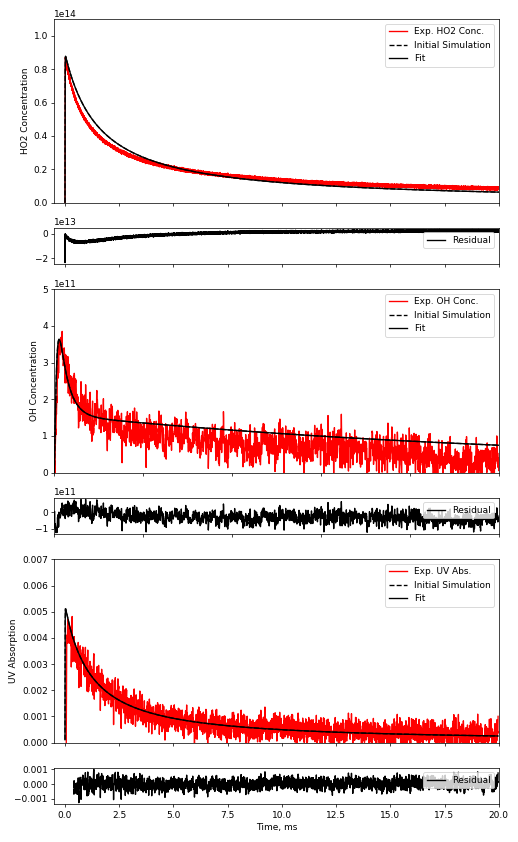

In [1039]:
#New model being developed from Data Evaluation - saved with all reactions

%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 13]

moda = '0725'
T=298
P=100.3
run = 'run007'

# Variables
t_start = 0 # ms
t_end = 20 # ms

VMf_HO2 = 2.1e12
VMf_OH = 3.27e10

m=.011
b=2.1e13

O2_0 = 1.57E+18
CH3COCH3_0 = 1.87E+16
CH3OH_0 = 3.93E+15
Cl2_0 = 1.05E+16
Cl_0 = (Cl2_0*m+b)*.81
Cl2_0 = Cl2_0-Cl_0

print('Initial acetone conc = '+"{:.2e}".format(CH3COCH3_0))
Ratio=CH3COCH3_0/CH3OH_0
print('Ratio intial Acetone/Methanol = '+"{:.2e}".format(Ratio))
print(' ')

# print('intial Cl = '+"{:.2e}".format(Cl2_0*m+b))
# CH2OH_0 = (radical_i)*(5.5e-11*CH3OH_0)/(2.1e-12*CH3COCH3_0+5.5e-11*CH3OH_0)
# CH3COCH2_0 = (radical_i)*(2.1e-12*CH3COCH3_0)/(2.1e-12*CH3COCH3_0+5.5e-11*CH3OH_0)
# print('total initial radical conc. = '+"{:.2e}".format(CH2OH_0+CH3COCH2_0))
initial_HO2=(Cl_0)*(5.5e-11*CH3OH_0)/(2.1e-12*CH3COCH3_0+5.5e-11*CH3OH_0)
initial_acetonylperoxy = (Cl_0)*(2.1e-12*CH3COCH3_0)/(2.1e-12*CH3COCH3_0+5.5e-11*CH3OH_0)
print('HO2 initial = '+"{:.2e}".format(initial_HO2))
print('acetonylperoxy_initial = '+"{:.2e}".format(initial_acetonylperoxy))
print('ratio of HO2/acetonylO2 = '+"{:.2e}".format(initial_HO2/initial_acetonylperoxy))

BR1=.5 #non-OH Channel for HO2+acetonylperoxy
k = (6.3e-12) #HO2 + acetonylperoxy ==> products
p3 = BR1, k

#import data
#uv
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/uv')
samp_file_uv = pd.read_table(run+'_UV.txt', sep='\t', header=None, skiprows=1)
data_tuv, data_uv= samp_file_uv.iloc[460:2458,0],samp_file_uv.iloc[500:2498,1]
#ir
os.chdir('/Users/kzuraski/Documents/Analysis/'+year+'/'+moda+'/ir')
samp_file_ir = pd.read_table(run+'_IR.txt', sep='\t', header=None, skiprows=1)
data_t, data_OH, data_HO2 = samp_file_ir.iloc[12499:62498,0],samp_file_ir.iloc[12499:62498,1],-samp_file_ir.iloc[12499:62498,2]
data_HO2 = data_HO2*VMf_HO2
data_OH = data_OH*VMf_OH - 5e10

t = np.linspace(t_start,t_end,len(data_OH),endpoint=False) # Calculate the time axis (ms)
weight_uv = np.transpose(np.ones(data_tuv.size)*5e14)
weight_ir1 = np.transpose(np.ones(data_t.size)/25)
weight_ir2 = np.transpose(np.ones(data_t.size)*500)
weight = np.append(weight_ir1,weight_ir2[:-4800], axis =0)
weight = np.append(weight,weight_uv[-1958:], axis =0) # order is OH, HO2, uv
idx_zero = np.abs(t).argmin()

# UV Absorption at 312 nm, L = 148
CS_CH3O2 = 2.7e-19
CS_CH3COO2 = 1.6e-19
CS_CH3COCH2O2 = 1.8e-18# 1.82e-18 Estimated from A.H., 1.78e-18 #Estimated from F.G., 1.08e-18 #Estimated from recommended values

kD = 1.7
kD1 = kD *(T/298)**(3/2) # Diffusion HO2
kD2 = kD * 0.985*(T/298)**(3/2) # Diffusion H2O2
kD3 = kD * 0.941*(T/298)**(3/2) # Diffusion OH
kD4 = kD * 0.741 *(T/298)**(3/2) # Diffusion acetonylO2
kD5 = kD *1.048 *(T/298)**(3/2) # Diffusion CH2O
kD6 = kD *0.838 *(T/298)**(3/2) # Diffusion CH3O2

## My model
k2 = 0.37*(8e-12) #2CH3COCH2O2==>CH3COCH3OH+CH3COCHO+O2
k2b = 0.63*(8e-12) #2CH3COCH2O2==>2CH3COCH2O+O2
k3 = ((3e-13)*np.exp(460/T)+(2.1e-33)*M*np.exp(920/T))+7.94e-29*CH3COCH3_0 #HO2+HO2==>H2O2+O2
print(('Keff = '+"{:.2e}".format(k3)))
print(((3e-13)*np.exp(460/T)+(2.1e-33)*M*np.exp(920/T)))
k4a = .96*((3e-29*M)/(1+((3e-29*M)/1e-12))*0.6**((1+(np.log10((3e-29*M)/1e-12))**2)**-1)) # CH3COCH2+O2==>CH3COCH2O2, equilibrium
k4b = .015*((3e-29*M)/(1+((3e-29*M)/1e-12))*0.6**((1+(np.log10((3e-29*M)/1e-12))**2)**-1)) # CH3COCH2+O2==>OH+products
k4c = .02*((3e-29*M)/(1+((3e-29*M)/1e-12))*0.6**((1+(np.log10((3e-29*M)/1e-12))**2)**-1)) # CH3COCH2+O2==>HO2+products
k5 = 5e-11 #CH3OH+Cl==>CH2OH+HCl 5.5
k6 = 1.12*((1.63e-11)*np.exp(-610/T))#CH3COCH3+Cl==>CH3COCH2+HCl
k7 = 9.1e-11 #CH2OH+O2==>CH2O+HO2
k8a = 0.85*(2.9e-12)*np.exp(345/T) #OH+CH3OH==>CH2OH+H2O
k8b = 0.15*(2.9e-12)*np.exp(345/T) #OH+CH3OH==>CH3O+H2O
k9a = .98*((1.33e-13)+(3.823e-11)*np.exp(-2000/T)) #OH+CH3COCH3==>H2O+CH3COCH2
k9b = .02*((1.33e-13)+(3.823e-11)*np.exp(-2000/T)) #OH+CH3COCH3==>CH3+CH3COOH
k10a = (1-1/(1+26.2*np.exp(-1130/T)))*((9.5e-14)*np.exp(390/T)) #2CH3O2==>2CH3O+O2
k10b = (1/(1+26.2*np.exp(-1130/T)))*((9.5e-14)*np.exp(390/T)) #2CH3O2==>CH3OH+CH2O+O2
k11a = (1-1/(1+495*np.exp(-1160/T)))*(3.8e-13)*np.exp(780/T) #(4.1e-13)*np.exp(750/T) #HO2+CH3O2==>CH3OOH+O2
k11b = (1/(1+495*np.exp(-1160/T)))*(3.8e-13)*np.exp(780/T) #HO2+CH3O2==>CH2O+H2O+O2
k12 = (3.8e-12)*np.exp(200/T) #OH+CH3OOH==>products
k13 = (3.9e-14)*np.exp(-900/T) #CH3O+O2==>CH2O+HO2
k14 = (3.4e-11)*np.exp(-1600/T) #O+CH2O==>products
k15 = (5.5e-12)*np.exp(125/T) #OH+CH2O==>H2O+HCO
k16 = (6.7e-15)*np.exp(600/T) #HO2+CH2O==>HOCH2O2
k21 = (((4e-31)*(300/T)**(-3.6)*M)/(1+(((4e-31)*(300/T)**(-3.6)*M)/(1.2e-12)*(300/T)**(1.1)))*0.6**((1+(np.log10(((4e-31)*(300/T)**(-3.6)*M)/(1.2e-12)*(300/T)**(1.1)))**2)**-1))  # CH3+O2==>CH3O2
k22a = 0.3*(7.5e-13)*np.exp(500/T) #CH3O2+CH3COCH2O2==>CH3COCH2O+CH3O+O2
k22b = 0.2*(7.5e-13)*np.exp(500/T) #CH3O2+CH3COCH2O2==>CH3COCH2OH+CH2O+O2
k22c = 0.5*(7.5e-13)*np.exp(500/T) #CH3O2+CH3COCH2O2==>CH3COCHO+CH3OH+O2
k26 = 1e-14#1e5 #CH3COCH2O+O2==>CH3COCHO+HO2
k27 = 1e5 #CH3COCH2O==>CH3CO+CH2O
k28a = 1.8e-12 #OH+OH==>H2O+O
k28b = ((((6.9e-31)*(300/T)**(-1))*M)/(1+((((6.9e-31)*(300/T)**(-1))*M)/(2.6e-11)))*0.6**((1+(np.log10((((6.9e-31)*(300/T)**(-1))*M)/(2.6e-11)))**2)**-1)) # OH+OH==>H2O2
k29 = (4.8e-11)*np.exp(250/T) #OH+HO2==>H2O+O2
k37 = 1.98E-15 #O+O2==>O3 
k55 = 7.8e-13 #OH+HCl==>H2O+Cl
k68_0= (7.39e-30)*(T/300)**(-2.2)
k68_inf= (4.88e-12)*(T/300)**(-.085)
k68a = ((k68_0*M)/(1+((k68_0*M)/k68_inf))*0.8**((1+(np.log10((k68_0*M)/k68_inf))**2)**-1)) # CH3CO+O2==>CH3COO2, Papadimitriou, 2015
k68b = (6.4e-14)*np.exp(820/T)*(1/(k68a/k68_inf)) # CH3CO+O2==>OH+products
k68c = 5.1e-12 - k68a - k68b #CH3CO+O2==>HO2+products
k69a = 0.29*1.72e-11 #HO2+CH3COO2==>CH3COOOH+O2
k69b = 0.23*1.72e-11 #HO2+CH3COO2==>CH3COOH+O3
k69c = 0.48*1.72e-11 #HO2+CH3COO2==>OH+CH3CO2+O2
k71a = 0.9*(2e-12)*np.exp(500/T) #CH3O2+CH3COO2==>CH3CO2+CH3O+O2
k71b = 0.1*(2e-12)*np.exp(500/T) #CH3O2+CH3COO2==>CH3COOH+CH2O+O2
k72 = 1e5 #CH3CO2==>CH3+CO2
k77a = .5*5e-12 #CH3COCH2O2 + CH3COO2==>CH3COCH2O + CH3CO2+O2
k77b = .5*5e-12 #CH3COCH2O2 + CH3COO2==>CH3COCHO + CH3COOH+O2
k78 =  2.9e-12*np.exp(500/T)#1.4e-11 #CH3COO2+CH3COO2==>CH3CO2+O2+CH3CO2
k86 = 5.6e-15*exp(2300/T) #HOCH2O2+HO2==>HO2+OH+O2+CH2O
k41a = (3.6e-11)*np.exp(-375/T) # Cl+HO2==>OH+ClO
k41b = (1.4e-11)*np.exp(270/T) # Cl+HO2==>O2+HCl

# print('Rate Constants:')
# display(k20)

HO2_0 = 0
CH3COCH2O2_0 = 0
CH3COCH2OOH_0 = 0
OH_0 = 0
CH3COCH2O_0 = 0
CH3COCH3OH_0 = 0
CH3COCHO_0 = 0
H2O2_0 = 0
CH3COCH2_0 = 0
products_0 = 0
CH2OH_0 = 0
HCl_0 = 0
CH2O_0 = 0
H2O_0 = 0
CH3O_0 = 0
CH3_0 = 0
CH3COOH_0 = 0
CH3O2_0 = 0
CH3OOH_0 = 0
O_0 = 0
HCO_0 = 0
HOCH2O2_0 = 0
CH3CO_0 = 0
CH3COCH2OH_0 = 0
CO2_0 = 0
O3_0 = 0
CH3COO2_0 = 0
CH3COOOH_0 = 0
CH3CO2_0 = 0

c3 = {}
c3['CH3OH'] = CH3OH_0*np.ones(t.size)
c3['CH3COCH3'] = CH3COCH3_0*np.ones(t.size)
c3['Cl'] = Cl_0*np.ones(t.size)
c3['O2'] = CH3COCH2O2_0*np.ones(t.size)

c3['HO2'] = np.zeros(t.size)
c3['CH3COCH2O2'] = np.zeros(t.size)
c3['CH3COCH2OOH'] = np.zeros(t.size)
c3['OH'] = np.zeros(t.size)
c3['CH3COCH2O'] = np.zeros(t.size)
c3['CH3COCH3OH'] = np.zeros(t.size)
c3['CH3COCHO'] = np.zeros(t.size)
c3['H2O2'] = np.zeros(t.size)
c3['CH3COCH2'] = np.zeros(t.size)
c3['products'] = np.zeros(t.size)
c3['CH2OH'] = np.zeros(t.size)
c3['HCl'] = np.zeros(t.size)
c3['CH2O'] = np.zeros(t.size)
c3['H2O'] = np.zeros(t.size)
c3['CH3O'] = np.zeros(t.size)
c3['CH3'] = np.zeros(t.size)
c3['CH3COOH'] = np.zeros(t.size)
c3['CH3O2'] = np.zeros(t.size)
c3['CH3OOH'] = np.zeros(t.size)
c3['O'] = np.zeros(t.size)
c3['HCO'] = np.zeros(t.size)
c3['HOCH2O2'] = np.zeros(t.size)
c3['CH3CO'] = np.zeros(t.size)
c3['CH3COCH2OH'] = np.zeros(t.size)
c3['CO2'] = np.zeros(t.size)
c3['O3'] = np.zeros(t.size)
c3['CH3COO2'] = np.zeros(t.size)
c3['CH3COOOH'] = np.zeros(t.size)
c3['CH3CO2'] = np.zeros(t.size)

def model_HO2_acetonylperoxy(t, p4):
    idx_zero = np.abs(t).argmin()
    BR1=.5#p4[0]
    BR2=1-BR1 #OH Channel
    k = 6.3e-12#p4[1]
    k1 = BR1*k # HO2+CH3COCH2O2==>CH3COCH2OOH+O2
    k1b = BR2*k # HO2+CH3COCH2O2==>CH3COCH2O+OH+O2
    y3 = np.array([HO2_0, CH3COCH2O2_0, CH3COCH2OOH_0, O2_0, OH_0, CH3COCH2O_0, CH3COCH3OH_0, CH3COCHO_0, H2O2_0, 
                   CH3COCH2_0, products_0, CH3OH_0, Cl_0, CH2OH_0, HCl_0, CH3COCH3_0, CH2O_0, H2O_0, CH3O_0, CH3_0, 
                   CH3COOH_0, CH3O2_0, CH3OOH_0, O_0, HCO_0, HOCH2O2_0, CH3CO_0, CH3COCH2OH_0, CO2_0, O3_0, 
                   CH3COO2_0, CH3COOOH_0, CH3CO2_0])
    
    def calc_dy4_dt(y4, t_curr):
        HO2 = y4[0]
        CH3COCH2O2 = y4[1]
        CH3COCH2OOH = y4[2]
        O2 = y4[3]
        OH = y4[4]
        CH3COCH2O = y4[5]
        CH3COCH3OH = y4[6]
        CH3COCHO = y4[7]
        H2O2 = y4[8]
        CH3COCH2 = y4[9]
        products = y4[10]
        CH3OH = y4[11]
        Cl = y4[12]
        CH2OH = y4[13]
        HCl = y4[14]
        CH3COCH3 = y4[15]
        CH2O = y4[16]
        H2O = y4[17]
        CH3O = y4[18]
        CH3 = y4[19]
        CH3COOH = y4[20]
        CH3O2 = y4[21]
        CH3OOH = y4[22]
        O = y4[23]
        HCO = y4[24]
        HOCH2O2 = y4[25]
        CH3CO = y4[26]
        CH3COCH2OH = y4[27]
        CO2 = y4[28]
        O3 = y4[29]
        CH3COO2 = y4[30]
        CH3COOOH = y4[31]
        CH3CO2 = y4[32]

        dHO2 = (-k1*HO2*CH3COCH2O2 -k1b*HO2*CH3COCH2O2 -k3*HO2*HO2 -k3*HO2*HO2 +k4c*O2*CH3COCH2 +k7*CH2OH*O2 
                -k11a*HO2*CH3O2 -k11b*HO2*CH3O2 +k13*CH3O*O2 -k16*HO2*CH2O +k26*CH3COCH2O*O2 -k29*OH*HO2 
                +k30*OH*H2O2 +k68c*CH3CO*O2 -k69a*HO2*CH3COO2 -k69b*HO2*CH3COO2 -k69c*HO2*CH3COO2 -k86*HOCH2O2*HO2 
                +k86*HOCH2O2*HO2 -kD1*HO2 -k41a*HO2*Cl -k41b*HO2*Cl)
        dCH3COCH2O2 = (-k1*HO2*CH3COCH2O2 -k1b*HO2*CH3COCH2O2 -k2*CH3COCH2O2*CH3COCH2O2 -k2*CH3COCH2O2*CH3COCH2O2 
                       -k2b*CH3COCH2O2*CH3COCH2O2 -k2b*CH3COCH2O2*CH3COCH2O2 +k4a*O2*CH3COCH2 -k22a*CH3O2*CH3COCH2O2 
                       -k22b*CH3O2*CH3COCH2O2 -k22c*CH3O2*CH3COCH2O2 -k77a*CH3COCH2O2*CH3COO2 -k77b*CH3COCH2O2*CH3COO2
                       -kD4*CH3COCH2O2)
        dCH3COCH2OOH = +k1*HO2*CH3COCH2O2
        dO2 = (+k1*HO2*CH3COCH2O2 +k1b*HO2*CH3COCH2O2 +k2*CH3COCH2O2*CH3COCH2O2 +k2b*CH3COCH2O2*CH3COCH2O2 +k3*HO2*HO2
               -k4a*O2*CH3COCH2 -k4b*O2*CH3COCH2 -k4c*O2*CH3COCH2 -k7*CH2OH*O2 +k10a*CH3O2*CH3O2 +k10b*CH3O2*CH3O2 
               +k11a*HO2*CH3O2 +k11b*HO2*CH3O2 -k13*CH3O*O2 -k21*CH3*O2 +k22a*CH3O2*CH3COCH2O2 
               +k22b*CH3O2*CH3COCH2O2 +k22c*CH3O2*CH3COCH2O2 -k26*CH3COCH2O*O2 +k29*OH*HO2
               -k68a*CH3CO*O2 -k68b*CH3CO*O2 -k68c*CH3CO*O2 +k69a*HO2*CH3COO2 +k69c*HO2*CH3COO2
               +k71a*CH3O2*CH3COO2 +k71b*CH3O2*CH3COO2 +k77a*CH3COCH2O2*CH3COO2 +k77b*CH3COCH2O2*CH3COO2 
               +k78*CH3COO2*CH3COO2 +k86*HOCH2O2*HO2 +k41b*HO2*Cl -k37*O*O2)
        dOH = (+k1b*HO2*CH3COCH2O2 +k4b*O2*CH3COCH2 -k8a*OH*CH3OH -k8b*OH*CH3OH -k9a*OH*CH3COCH3 -k9b*OH*CH3COCH3 
               -k12*OH*CH3OOH -k15*OH*CH2O -k28a*OH*OH -k28a*OH*OH -k28b*OH*OH -k28b*OH*OH -k29*OH*HO2 -k30*OH*H2O2 
               -k55*OH*HCl +k68b*CH3CO*O2 +k41a*HO2*Cl +k69c*HO2*CH3COO2 +k86*HOCH2O2*HO2 -kD3*OH)
        dCH3COCH2O = (+k1b*HO2*CH3COCH2O2 +k2b*CH3COCH2O2*CH3COCH2O2 +k2b*CH3COCH2O2*CH3COCH2O2 +k22a*CH3O2*CH3COCH2O2
                      -k26*CH3COCH2O*O2 -k27*CH3COCH2O +k77a*CH3COCH2O2*CH3COO2)
        dCH3COCH3OH = +k2*CH3COCH2O2*CH3COCH2O2
        dCH3COCHO = +k2*CH3COCH2O2*CH3COCH2O2 +k22c*CH3O2*CH3COCH2O2 +k26*CH3COCH2O*O2 +k77b*CH3COCH2O2*CH3COO2
        dH2O2 = +k3*HO2*HO2 +k28b*OH*OH -k30*OH*H2O2 -kD2*H2O2
        dCH3COCH2 = -k4a*O2*CH3COCH2 -k4b*O2*CH3COCH2 -k4c*O2*CH3COCH2 +k6*CH3COCH3*Cl +k9a*OH*CH3COCH3
        dproducts = (+k4b*O2*CH3COCH2 +k4c*O2*CH3COCH2 +k12*OH*CH3OOH +k14*O*CH2O +k68b*CH3CO*O2 +k68c*CH3CO*O2 
                     +k41a*HO2*Cl +k37*O*O2)
        dCH3OH = -k5*CH3OH*Cl -k8a*OH*CH3OH -k8b*OH*CH3OH +k10b*CH3O2*CH3O2 +k22c*CH3O2*CH3COCH2O2
        dCl = -k5*CH3OH*Cl -k6*CH3COCH3*Cl +k55*OH*HCl -k41a*HO2*Cl -k41b*HO2*Cl
        dCH2OH = +k5*CH3OH*Cl -k7*CH2OH*O2 +k8a*OH*CH3OH
        dHCl = +k5*CH3OH*Cl +k6*CH3COCH3*Cl -k55*OH*HCl +k41b*HO2*Cl
        dCH3COCH3 = -k6*CH3COCH3*Cl -k9a*OH*CH3COCH3 -k9b*OH*CH3COCH3
        dCH2O = (+k7*CH2OH*O2 +k10b*CH3O2*CH3O2 +k11b*HO2*CH3O2 +k13*CH3O*O2 -k14*O*CH2O -k15*OH*CH2O -k16*HO2*CH2O 
                 +k22b*CH3O2*CH3COCH2O2 +k27*CH3COCH2O +k71b*CH3O2*CH3COO2 +k86*HOCH2O2*HO2 -kD5*CH2O)
        dH2O = (+k8a*OH*CH3OH +k8b*OH*CH3OH +k9a*OH*CH3COCH3 +k11b*HO2*CH3O2 +k15*OH*CH2O 
                +k28a*OH*OH +k29*OH*HO2 +k30*OH*H2O2 +k55*OH*HCl)
        dCH3O = (+k8b*OH*CH3OH +k10a*CH3O2*CH3O2 +k10a*CH3O2*CH3O2 -k13*CH3O*O2 +k22a*CH3O2*CH3COCH2O2 +k71a*CH3O2*CH3COO2)
        dCH3 = +k9b*OH*CH3COCH3 -k21*CH3*O2 +k72*CH3CO2
        dCH3COOH = (+k9b*OH*CH3COCH3 +k69b*HO2*CH3COO2 +k71b*CH3O2*CH3COO2 +k77b*CH3COCH2O2*CH3COO2)
        dCH3O2 = (-k10a*CH3O2*CH3O2 -k10a*CH3O2*CH3O2 -k10b*CH3O2*CH3O2 -k10b*CH3O2*CH3O2 -k11a*HO2*CH3O2 
                  -k11b*HO2*CH3O2 +k21*CH3*O2 -k22a*CH3O2*CH3COCH2O2 -k22b*CH3O2*CH3COCH2O2 -k22c*CH3O2*CH3COCH2O2 
                  -k71a*CH3O2*CH3COO2 -k71b*CH3O2*CH3COO2 -kD6*CH3O2)
        dCH3OOH = +k11a*HO2*CH3O2 -k12*OH*CH3OOH
        dO = -k14*O*CH2O +k28a*OH*OH -k37*O*O2
        dHCO = +k15*OH*CH2O
        dHOCH2O2 = +k16*HO2*CH2O -k86*HOCH2O2*HO2
        dCH3CO = +k22a*CH3O2*CH3COCH2O2 +k27*CH3COCH2O -k68a*CH3CO*O2 -k68b*CH3CO*O2 -k68c*CH3CO*O2
        dCH3COCH2OH = +k22b*CH3O2*CH3COCH2O2
        dCO2 = +k72*CH3CO2
        dO3 = +k69b*HO2*CH3COO2
        dCH3COO2 = (+k68a*CH3CO*O2 -k69a*HO2*CH3COO2 -k69b*HO2*CH3COO2 -k69c*HO2*CH3COO2 -k71a*CH3O2*CH3COO2 
                    -k71b*CH3O2*CH3COO2 -k77a*CH3COCH2O2*CH3COO2 -k77b*CH3COCH2O2*CH3COO2 
                    -k78*CH3COO2*CH3COO2 -k78*CH3COO2*CH3COO2)
        dCH3COOOH = +k69a*HO2*CH3COO2
        dCH3CO2 = (+k69c*HO2*CH3COO2 +k71a*CH3O2*CH3COO2 -k72*CH3CO2 
                   +k77a*CH3COCH2O2*CH3COO2 +k78*CH3COO2*CH3COO2 +k78*CH3COO2*CH3COO2)

        dy4_dt = np.array([dHO2, dCH3COCH2O2, dCH3COCH2OOH, dO2, dOH, dCH3COCH2O, dCH3COCH3OH, dCH3COCHO, dH2O2, 
                           dCH3COCH2, dproducts, dCH3OH, dCl, dCH2OH, dHCl, dCH3COCH3, dCH2O, dH2O, dCH3O, dCH3, 
                           dCH3COOH, dCH3O2, dCH3OOH, dO, dHCO, dHOCH2O2, dCH3CO, dCH3COCH2OH, dCO2, 
                           dO3, dCH3COO2, dCH3COOOH, dCH3CO2])
        return dy4_dt

    odeint_out = odeint(calc_dy4_dt, y3, t[idx_zero:]/1000)    
    c3['HO2'][idx_zero:] = odeint_out.T[0]
    c3['CH3COCH2O2'][idx_zero:] = odeint_out.T[1]
    c3['CH3COCH2OOH'][idx_zero:] = odeint_out.T[2]
    c3['O2'][idx_zero:] = odeint_out.T[3]
    c3['OH'][idx_zero:] = odeint_out.T[4]
    c3['CH3COCH2O'][idx_zero:] = odeint_out.T[5]
    c3['CH3COCH3OH'][idx_zero:] = odeint_out.T[6]
    c3['CH3COCHO'][idx_zero:] = odeint_out.T[7]
    c3['H2O2'][idx_zero:] = odeint_out.T[8]
    c3['CH3COCH2'][idx_zero:] = odeint_out.T[9]
    c3['products'][idx_zero:] = odeint_out.T[10]
    c3['CH3OH'][idx_zero:] = odeint_out.T[11]
    c3['Cl'][idx_zero:] = odeint_out.T[12]
    c3['CH2OH'][idx_zero:] = odeint_out.T[13]
    c3['HCl'][idx_zero:] = odeint_out.T[14]
    c3['CH3COCH3'][idx_zero:] = odeint_out.T[15]
    c3['CH2O'][idx_zero:] = odeint_out.T[16]
    c3['H2O'][idx_zero:] = odeint_out.T[17]
    c3['CH3O'][idx_zero:] = odeint_out.T[18]
    c3['CH3'][idx_zero:] = odeint_out.T[19]
    c3['CH3COOH'][idx_zero:] = odeint_out.T[20]
    c3['CH3O2'][idx_zero:] = odeint_out.T[21]
    c3['CH3OOH'][idx_zero:] = odeint_out.T[22]
    c3['O'][idx_zero:] = odeint_out.T[23]
    c3['HCO'][idx_zero:] = odeint_out.T[24]
    c3['HOCH2O2'][idx_zero:] = odeint_out.T[25]
    c3['CH3CO'][idx_zero:] = odeint_out.T[26]
    c3['CH3COCH2OH'][idx_zero:] = odeint_out.T[27]
    c3['CO2'][idx_zero:] = odeint_out.T[28]
    c3['O3'][idx_zero:] = odeint_out.T[29]
    c3['CH3COO2'][idx_zero:] = odeint_out.T[30]
    c3['CH3COOOH'][idx_zero:] = odeint_out.T[31]
    c3['CH3CO2'][idx_zero:] = odeint_out.T[32]
    
    UV = (CS_CH3COCH2O2*c3['CH3COCH2O2']+CS_CH3O2*c3['CH3O2']+CS_CH3COO2*c3['CH3COO2'])*148                   
    return c3, UV

def fit (model_HO2_NO,t):
    def calc_cost(p4):
        res = []
        c3,UV = model_HO2_acetonylperoxy(t, p4)
        UV = UV[1::25]
        OH = c3['OH']
        OH=OH[:-4800]
        mod = np.append(c3['HO2'], OH,axis = 0)
        mod = np.append(mod, UV[-1958:], axis = 0)
        obs = np.append(data_HO2, data_OH[:-4800], axis = 0)
        obs = np.append(obs, data_uv[-1958:], axis = 0)
        incentive =1e6
        if np.any((c3['OH'])<0) or p4[0]>1 or p4[0]<0 or np.any((UV)<0): # Sudo-limit on concentration by applying penalty for negative values
            res = incentive *np.sqrt(weight)*abs(obs-mod)
            return res
#         elif p4[0]<1:
#             res =  np.sqrt(np.concatenate(weight))*abs(np.concatenate(obs)-np.concatenate(mod))-incentive
#             return res
        else:
            res = np.sqrt(weight)*abs(obs-mod)
            return res 
        res[res==-inf]=0
        return res
    print('Initial Cost Function Value:{:g}'.format((calc_cost(p3)**2).sum()))
    print()
    p4, cov_p4, infodict, mesg, ier = leastsq(calc_cost, p3, full_output = True, maxfev=10000000)
    cost = (infodict['fvec']**2).sum()
    if cov_p4 is not None:
        P = infodict['fvec'].size
        Q = p.size
        cov_p4 *=cost/(P-Q)
        p4_err = np.sqrt(np.diag(cov_p4))
        corr_p4 = np.array([[cov_p4[i][j]/(np.sqrt(cov_p4[i][i]*cov_p4[j][j])) 
                            for j in range(cov_p4.shape[1])] for i in range(cov_p4.shape[0])])
        print(corr_p4)
        print()
    print('Optimized Cost Function Value = {:g}'.format(cost))
    print()
    return p4, cov_p4, cost, mesg, ier

p4, cov_p4, cost, mesg, ier = fit(model_HO2_acetonylperoxy, t)

print('Initial Guesses = BR1, BR2 (OH Channel), k')
print(p3[0],1-p3[0],"{:.2e}".format(p3[1]))
print(' ')
print('Optimized Parameters = BR1, BR2 (OH Channel), k')
print('') 
print(p4[0], 1-p4[0], "{:.2e}".format(p4[1]))

c4_i, uv_i = model_HO2_acetonylperoxy(t, p3)
uv_i = uv_i[1::25]
OH_i=c4_i['OH']

f3, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=False, gridspec_kw = {'height_ratios':[5, 1, 5, 1, 5, 1]})
plt.rcParams['figure.figsize'] = [1, 1]
ax1.plot(data_t,data_HO2, c = 'r', label = 'Exp. HO2 Conc.')
ax3.plot(data_t,data_OH, c = 'r', label = 'Exp. OH Conc.')
ax5.plot(data_tuv,data_uv, c = 'r', label = 'Exp. UV Abs.')
ax1.set_ylim([0, 1.1e14])
ax3.set_ylim([0, .5e12])
ax5.set_ylim([0, .007])

for ax in (ax1, ax2, ax5, ax6):
    ax.set_xlim([-.5, 20])
for ax in (ax3, ax4):
    ax.set_xlim([0, 1])
ax1.set(ylabel='HO2 Concentration')
ax3.set(ylabel='OH Concentration')
ax5.set(ylabel = 'UV Absorption')
ax2.set(xlabel='Time, ms')
ax4.set(xlabel='Time, 1 ms')
ax6.set(xlabel='Time, ms')
ax1.plot(data_t,c4_i['HO2'], c = 'k', linestyle ='dashed', label = 'Initial Simulation')
ax3.plot(data_t[:-47500],OH_i[:-47500], c = 'k', linestyle ='dashed', label = 'Initial Simulation')
ax5.plot(data_tuv, uv_i[:-2], c = 'k', linestyle ='dashed', label = 'Initial Simulation')                            

c4, uv = model_HO2_acetonylperoxy(t, p4)
uv = uv[1::25]
OH_f=c4['OH']
OH_f=OH_f[:-47500]

ax1.plot(t,c4['HO2'], c = 'k', label = 'Fit')
ax2.plot(t, (data_HO2-c4['HO2']), c='k', label='Residual')
ax3.plot(t[:-47500],OH_f, c = 'k', label = 'Fit')
ax4.plot(t[:-47500],(data_OH[:-47500]-OH_f), c='k', label='Residual')
ax5.plot(data_tuv, uv[:-2], c = 'k', label = 'Fit')  
ax6.plot(data_tuv[-1958:],(data_uv[-1958:]-uv[-1958:]), c='k', label='Residual')

for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.label_outer()
    ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

# from pandas import DataFrame, ExcelWriter
# DF = DataFrame(c4)
# with ExcelWriter('Run7_BR35.xlsx') as writer:
#      DF.to_excel(writer)

# print('Residual averages for HO2, OH, UV')
# print(mean(data_HO2-c4_i['HO2']))
# print(mean(data_OH[:-44500]-OH_i[:-44500]))
# print(mean(data_uv[-1958:]-uv_i[-1958:]))
                  